Add the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Read data

In [2]:
df = pd.read_csv("/content/Breast_Cancer.csv")

In [3]:

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [4]:
check(df)

,column,dtypes,nunique,sum_null
0,Age,int64,40,0
1,Race,object,3,0
2,Marital Status,object,5,0
3,T Stage,object,4,0
4,N Stage,object,3,0
5,6th Stage,object,5,0
6,differentiate,object,4,0
7,Grade,object,4,0
8,A Stage,object,2,0
9,Tumor Size,int64,110,0


Data Preprocessing

Convert 'Status' column to numeric

In [5]:
df['Status'] = df['Status'].map({'Alive': 0, 'Dead': 1})

In [6]:
X = df.drop(columns=['Status'])
y = df['Status']

In [7]:
X = pd.get_dummies(X, drop_first=True)

Split the data into training set and test set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Building a Gradient Boosting Model**

In [9]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**Model prediction and evaluation**

In [10]:
y_pred = model.predict(X_test)

Print out the evaluation indexes

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9142857142857143

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.85      0.52      0.64       120

    accuracy                           0.91       805
   macro avg       0.89      0.75      0.80       805
weighted avg       0.91      0.91      0.91       805



Plot the confusion matrix

Plotted as a heatmap to visualize the distribution between correct and incorrect predictions.

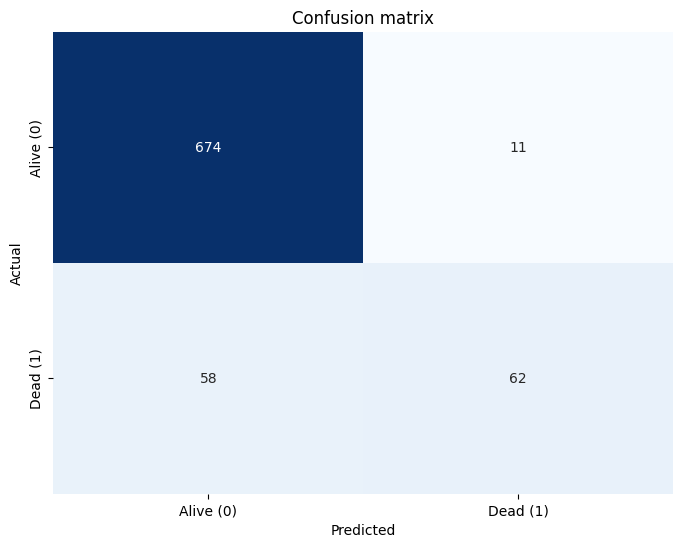

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Alive (0)', 'Dead (1)'],
            yticklabels=['Alive (0)', 'Dead (1)'])
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Scatter Plot

Draws the relationship between actual and predicted values, helping to detect problems in predictions.

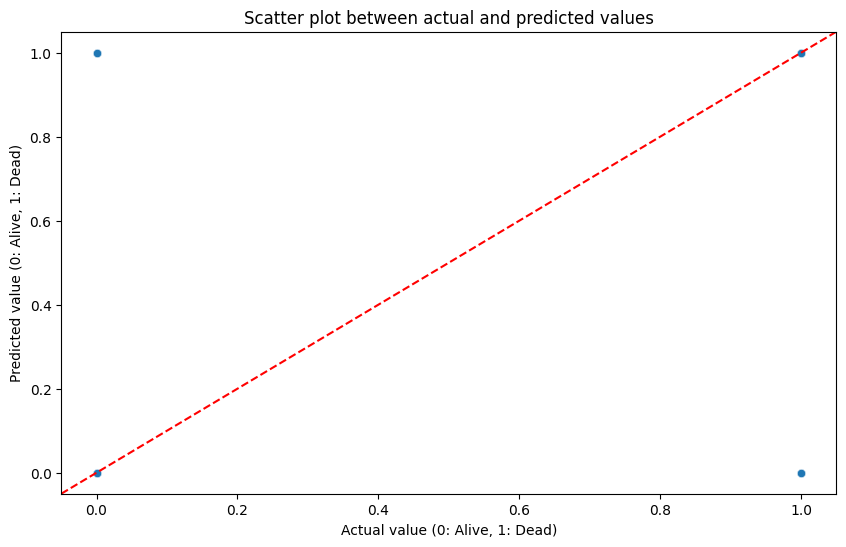

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.title("Scatter plot between actual and predicted values")
plt.xlabel("Actual value (0: Alive, 1: Dead)")
plt.ylabel("Predicted value (0: Alive, 1: Dead)")
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.show()

Plot histogram for 'Survival Months' column

Shows the distribution of the Survival Months column, giving a better understanding of the values ​​of this feature.

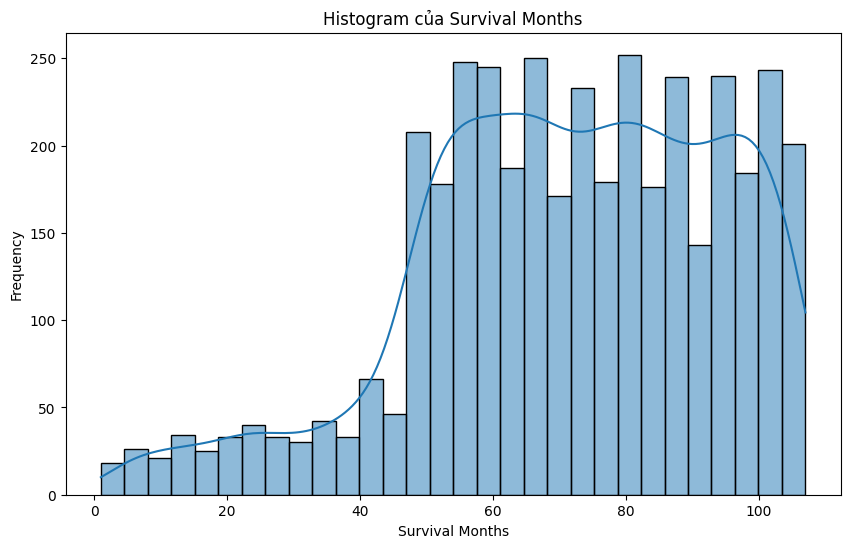

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Survival Months'], bins=30, kde=True)
plt.title('Histogram của Survival Months')
plt.xlabel('Survival Months')
plt.ylabel('Frequency')
plt.show()

**Analysis of Model Results**

The Gradient Boosting model was applied to classify the survival status of patients (based on the Status column). After training, the model predicted the outcomes for patients in the test set.

The following evaluation metrics were generated:

* Accuracy
* Classification Report
* Confusion Matrix

**Impact of Data Preprocessing**

Data preprocessing played a critical role in improving the model's performance:

* Converting Status to numerical values.
* One-Hot Encoding for categorical columns.
* Splitting the dataset.

**Significance of Results for the Research Problem**
* Identifying Influential Factors: The Gradient Boosting model helps identify factors influencing the survival status of breast cancer patients, enabling timely medical interventions.
* Survival Prediction: Doctors can use this model to predict patient survival probabilities, guiding appropriate treatment planning.

**Limitations of the Study**
* Incomplete Data: The dataset may lack completeness.
* Limited Model Information: Detailed information about the model was not provided.
* Insufficient Features: The dataset may not include enough features to fully capture the problem's complexity.

**Scalability and Improvements**
* Data Augmentation: Increasing the dataset size or diversity can improve model robustness.
* Exploring Other Models: Alternatives such as XGBoost or LightGBM might achieve higher performance on datasets with complex features.

**Comparison with Other Studies**

Gradient Boosting is recognized as one of the most powerful models for classification tasks, especially for problems with numerous features. Other studies have also shown that Gradient Boosting can achieve high accuracy in classifying cancer patients, often outperforming traditional machine learning models such as Logistic Regression or SVM in many scenarios.